# Assignment 5 #
### Due: Friday, November 17th to be submitted via Canvas by 11:59 pm ###
### Total points: **65** ###

Homework Group - 15
<br> <br>
Student Names - <br>Simran Kaur (sk57859), <br>Nikhil Nair (nn8446)

# Q1: Support Vector Machines (10 points)

In this question, we will explore support vector machines for the Spam Base dataset from the UCI repository.

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
seed = 42

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets
print("Abstract:", spambase.metadata['abstract'])
print("Number of instances:", spambase.metadata['num_instances'])
print("Number of features:", spambase.metadata['num_features'])
print(spambase.variables['name'])

Abstract: Classifying Email as Spam or Non-Spam
Number of instances: 4601
Number of features: 57
0                 word_freq_make
1              word_freq_address
2                  word_freq_all
3                   word_freq_3d
4                  word_freq_our
5                 word_freq_over
6               word_freq_remove
7             word_freq_internet
8                word_freq_order
9                 word_freq_mail
10             word_freq_receive
11                word_freq_will
12              word_freq_people
13              word_freq_report
14           word_freq_addresses
15                word_freq_free
16            word_freq_business
17               word_freq_email
18                 word_freq_you
19              word_freq_credit
20                word_freq_your
21                word_freq_font
22                 word_freq_000
23               word_freq_money
24                  word_freq_hp
25                 word_freq_hpl
26              word_freq_george
27          

In [5]:
# Reloading based on update mail
import pandas as pd

df = pd.read_csv("spambase.data", header=None)
y = df[57]
X = df.drop(columns=[57])

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [7]:
seed = 42
y = y.to_numpy().squeeze()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

a. (5 points) Implement the following function to train SVMs with a specified kernel type, hyper-parameter search space, and random state on the Spam Base dataset. Do hyper-parameter search over $C$ using [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), setting the number of folds to 5. After finding the best C, please use it to train the final model and return both the final model and the best C.

In [8]:
def search_best_svm(kernel, C_search_space, random_state):
    best_score = -np.inf
    for C in C_search_space:
        # Initialize an SVM classifier with the specified kernel type, C value, and random state
        ### START CODE ###
        svm_classifier = SVC(kernel=kernel, C=C, random_state=random_state)
        ### END CODE ###

        # Evaluate accuracy scores using 5-fold cross-validation scores
        ### START CODE ###
        scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
        ### END CODE ###

        # Compute the average score and compare with the current best score to update the best C
        ### START CODE ###
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_C = C
        ### END CODE ###
        print(f"C: {C:.3f}{'':<5}Avg Cross Val Score: {np.round(score, 3)}")

    print(f"Best C: {best_C}")

    # Initialize the model using the specified kernel type, best C, and random state;
    # and then fit the model using training set
    ### START CODE ###
    model = SVC(kernel=kernel, C=best_C, random_state=random_state)
    model.fit(X_train, y_train)
    ### END CODE ###
    return model, best_C

b. (3 points) Run the function you implemented above to train SVMs with the search space of $C$ being [$0.1, 1, 10, 100$], random state set to 42, with the following three popular kernels: (i) linear (ii) polynomial (iii) RBF (Gaussian). Evaluate your final models on the test set and report their accuracies.

In [9]:
# C search space
C_search_space = [0.1, 1, 10, 100]

# Kernel types
kernels = ['linear', 'poly', 'rbf']

# Initialize dictionaries to store the models and best C values
svm_models = {}
best_C_values = {}

# Train SVMs with different kernels and find the best C for each
for kernel in kernels:
    print(f"\nTraining {kernel} SVM:")
    model, best_C = search_best_svm(kernel, C_search_space, seed)
    svm_models[kernel] = model
    best_C_values[kernel] = best_C

# Evaluate and report accuracies of the final models on the test set
print(f"\n")
for kernel in kernels:
    model = svm_models[kernel]
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Test accuracy with {kernel} kernel and best C={best_C_values[kernel]}: {test_accuracy:.3f}")


Training linear SVM:
C: 0.100     Avg Cross Val Score: 0.921
C: 1.000     Avg Cross Val Score: 0.926
C: 10.000     Avg Cross Val Score: 0.928
C: 100.000     Avg Cross Val Score: 0.927
Best C: 10

Training poly SVM:
C: 0.100     Avg Cross Val Score: 0.689
C: 1.000     Avg Cross Val Score: 0.759
C: 10.000     Avg Cross Val Score: 0.843
C: 100.000     Avg Cross Val Score: 0.896
Best C: 100

Training rbf SVM:
C: 0.100     Avg Cross Val Score: 0.896
C: 1.000     Avg Cross Val Score: 0.924
C: 10.000     Avg Cross Val Score: 0.924
C: 100.000     Avg Cross Val Score: 0.912
Best C: 10


Test accuracy with linear kernel and best C=10: 0.928
Test accuracy with poly kernel and best C=100: 0.913
Test accuracy with rbf kernel and best C=10: 0.935


c. (2 points) Train a logistic regression model using the training set. Compare its performance with that of the SVMs trained above.

In [10]:
# Train logistic regression model
logreg = LogisticRegression(random_state=seed, max_iter=10000)
logreg.fit(X_train, y_train)

# Evaluate the model on the test set
logreg_test_accuracy = accuracy_score(y_test, logreg.predict(X_test))
print(f"Test accuracy for Logistic Regression: {logreg_test_accuracy:.4f}\n")

# Compare with SVM models
for kernel in kernels:
    svm_test_accuracy = accuracy_score(y_test, svm_models[kernel].predict(X_test))
    print(f"Test accuracy for {kernel} SVM: {svm_test_accuracy:.4f} (Best C: {best_C_values[kernel]})")

    # Compare the results
    if svm_test_accuracy > logreg_test_accuracy:
        print(f"SVM with {kernel} kernel outperforms Logistic Regression\n")
    elif svm_test_accuracy < logreg_test_accuracy:
        print(f"Logistic Regression outperforms SVM with {kernel} kernel\n")
    else:
        print(f"SVM with {kernel} kernel and Logistic Regression have the same accuracy\n")

Test accuracy for Logistic Regression: 0.9223

Test accuracy for linear SVM: 0.9283 (Best C: 10)
SVM with linear kernel outperforms Logistic Regression

Test accuracy for poly SVM: 0.9125 (Best C: 100)
Logistic Regression outperforms SVM with poly kernel

Test accuracy for rbf SVM: 0.9354 (Best C: 10)
SVM with rbf kernel outperforms Logistic Regression



> **Support Vector Machines (SVMs) potentially exhibit superior performance over Logistic Regression in various scenarios.** This can be attributed to SVMs' capacity to manage non-linear data correlations by incorporating non-linear kernels. Their resilience to outliers also plays a crucial role, enabling SVMs to better generalize across intricate datasets, unlike the linear decision boundary defined by Logistic Regression. The enhancement in performance is further bolstered by the opportunities for fine-tuning SVM parameters and employing the kernel trick, which offers a versatile approach to discerning complex patterns in the data.

# Question 2 : Ensemble Methods for Classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) classifiers.

We will look at the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset for this question. The dataset is extremely large so for this question we will only consider a subset which has been provided along with the notebook for this assignment. The dataset has already been split into train and test sets.

The task is to predict the probability that someone will experience financial distress in the next two years.

In [11]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [12]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [13]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train:',X_train.shape, y_train.shape)
print('test:',X_test.shape, y_test.shape)

train: (3750, 10) (3750,)
test: (1250, 10) (1250,)


In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [15]:
columns_list = list(X.columns)

a. (2.5 pts) Fit a Decision Tree Classifier with random_state = 14 for this classification problem. Report the accuracy_score and roc_auc_score on the test set.

In [16]:
def fit_classifier(clf):
    # Fit the classifier on the training set
    ### START CODE ###
    clf.fit(X_train, y_train)
    ### END CODE ###
    return clf

In [17]:
def evaluate_classifier(clf, X_test, y_test):
  # Compute the accuracy_score, and roc_auc_score on the test set
  ### START CODE ###
  y_pred = clf.predict(X_test)
  y_pred_proba = clf.predict_proba(X_test)[:, 1]

  acc_score = accuracy_score(y_test, y_pred)
  auc_score = roc_auc_score(y_test, y_pred_proba)
  ### END CODE ###
  print("Accuracy_score: {}, ROC_AUC_score: {}".format(acc_score, auc_score))

In [18]:
print("Decision Tree")
# Initialize your decision tree classifier
### START CODE ###
dt_clf = DecisionTreeClassifier(random_state=14)
### END CODE ###

dt_clf = fit_classifier(dt_clf)
evaluate_classifier(dt_clf, X_test, y_test)

Decision Tree
Accuracy_score: 0.888, ROC_AUC_score: 0.5854582176218127


b. (2.5 pts) Create a [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) of 25 classifiers (i.e, n_estimators=25) with random_state=14. Please use Decision Tree Classifier with random_state=14 as the base classifier. Report accuracy_score and roc_auc_score on the test data for this emsemble classifier.

In [19]:
print("Bagging of Decesion Trees")
# Initialize your bagging classifier
### START CODE ###
bag_clf = BaggingClassifier(base_estimator=dt_clf, n_estimators=25, random_state=14)
### END CODE ###

bag_clf = fit_classifier(bag_clf)
evaluate_classifier(bag_clf, X_test, y_test)

Bagging of Decesion Trees
Accuracy_score: 0.9256, ROC_AUC_score: 0.7857106791214341


c. (5 pts) In this question, you will fit a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model on the training data for this classification task.

1. First, please find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch.
2. Fit a model using the best parameters, and report the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data.

In [20]:
def grid_search_for_classifier(clf, param_grid, X_train, y_train):
  # Grid search
    grid_search = GridSearchCV(clf, param_grid=param_grid)

  # Conduct grid search using the training set (1 line of code only)
  ### START CODE ###
    grid_search.fit(X_train, y_train)
  ### END CODE ###
    print(grid_search.best_params_)

  # Set the best paramters for your clf (1 line of code only)
  ### START CODE ###
    clf.set_params(**grid_search.best_params_)
  ### END CODE ###
    return clf

In [21]:
def train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    t0 = time()
  # Fit your classifier on the training set
  ### START CODE ###
    clf.fit(X_train, y_train)
  ### END CODE ###
    print("training time", round(time()-t0, 3), "s")

    t0 = time()
    y_pred = clf.predict(X_test)
    print("predict time", round(time()-t0, 3), "s")

    print("Confusion matrix: ")
  # Print the confusion matrix computed from the test set (1 line of code only)
  ### START CODE ###
    print(confusion_matrix(y_test, y_pred))
  ### END CODE ###


  ### START CODE ###
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    acc_score = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
  ### END CODE ###

    print("Accuracy: {}, AUC_ROC: {}".format(acc_score, auc_score))
    return clf

In [22]:
param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Initialize your random forest classifier
### START CODE ###
rf_clf = RandomForestClassifier()
### END CODE ###
rf_clf = grid_search_for_classifier(rf_clf, param_grid, X_train, y_train)
train_and_evaluate_classifier(rf_clf, X_train, y_train, X_test, y_test)

{'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}
training time 0.432 s
predict time 0.016 s
Confusion matrix: 
[[1162    3]
 [  82    3]]
Accuracy: 0.932, AUC_ROC: 0.8375612219136582


RandomForestClassifier(criterion='entropy', max_features=1, random_state=17)

d. (10 pts) This time, let us use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) and [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) for the same task. For AdaBoost and XGBoost, please respectively find the best parameters (including *n_estimators, learning_rate*); fit your model using the best parameters, and report the confusion matrix and roc_auc_score on test data.

In [23]:
param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

In [24]:
# Initialize your AdaBoost classifier
### START CODE ###
ab_clf = AdaBoostClassifier()
### END CODE ###
ab_clf = grid_search_for_classifier(ab_clf, param_grid, X_train, y_train)
train_and_evaluate_classifier(ab_clf, X_train, y_train, X_test, y_test)

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.442 s
predict time 0.016 s
Confusion matrix: 
[[1153   12]
 [  72   13]]
Accuracy: 0.9328, AUC_ROC: 0.8390254986114618


AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=17)

In [25]:
# Initialize your XGBoost classifier
### START CODE ###
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
### END CODE ###
xgb_clf = grid_search_for_classifier(xgb_clf, param_grid, X_train, y_train)
train_and_evaluate_classifier(xgb_clf, X_train, y_train, X_test, y_test)

{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.094 s
predict time 0.0 s
Confusion matrix: 
[[1163    2]
 [  84    1]]
Accuracy: 0.9312, AUC_ROC: 0.8267962635698057


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=17, ...)

f. (5 pts) Compare the performance of decision tree from part a) with the ensemble methods. Briefly explain which of the three ensemble methods performed better and why?

| Method         | Accuracy Score | ROC AUC Score            |
| -------------- | -------------- | ------------------------ |
| Decision Tree  | 0.888          | 0.5854582176218127       |
| Bagging  | 0.9256|0.7857106791214341   |
| Random Forest  | 0.932       | 0.8375612219136582       |
| Adaboost | 0.9328      |  0.8390254986114618   |
|XGBoost | 0.9312 | 0.8267962635698057 |

>We can clearly see that the Ensemble methods performed better than the Decision Trees, as they have consistently outperformed the Decision Tree in both accuracy and ROC AUC score.
<br><br>
Amongst the ensemble methods, Adaboost is performing the best here, with the highest accuracy and ROC, wheras Random Forest is the close second. The choice between AdaBoost and Random Forest might depend on the specific requirements of the task, the interpretability of the model, and considerations regarding computational efficiency.
<br><br>
In conclusion, we can say that when compared to the Decision Tree, all the ensemble methods demonstrate improved performance, with AdaBoost being the top performer in this particular evaluation.



# Q3: CatBoost (10 points)

In this question you will learn about a boosting algorithm known as **CatBoost**. Please go through the two videos specified below to get a better understanding of the CatBoost algorithm and answer the questions that follow.

[Part-1](https://www.youtube.com/watch?v=KXOTSkPL2X4&ab_channel=StatQuestwithJoshStarmer)
[Part - 2](https://www.youtube.com/watch?v=3Bg2XRFOTzg&t=242s&ab_channel=StatQuestwithJoshStarmer)



a. **(5 points)** Briefly explain Ordered Target Encoding. What challenge does it try to address?

b. **(5 points)** Briefly describe the main advantages and disadvantages of CatBoost as compared to XGBoost.

> a)
<br>
Ordered Target Encoding in CatBoost is a specialized technique for encoding categorical variables whihch acknowledges the sequential arrangement of rows in a dataset. This approach revolves around the concept of treating each data row as if it were fed into the algorithm sequentially, ensuring that the encoding process respects the chronological order of the data, processing each row in the order it appears and taking into account the information available up to that point. Instead of relying on an overarching mean, CatBoost introduces the use of a predefined prior or guess for encoding, a value often determined through domain knowledge or experimental insights. Furthermore, the encoding equation is streamlined for computational efficiency by simplifying it through the addition of 1 to the denominator.
<br> The equation for calculatinf Catboost encoding is given by the formula :
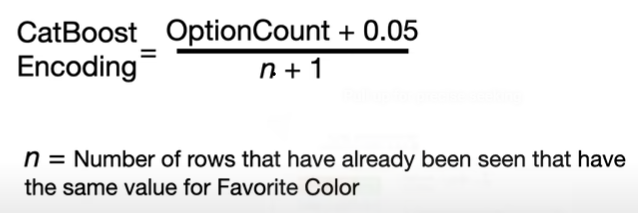
The method itself is inherently sequential, leveraging information from all preceding rows when encoding the current row. Notably, the order of data is paramount in this encoding process, culminating in the designation of "Ordered Target Encoding." Overall, this technique is a deliberate and effective strategy within CatBoost, ensuring that encoding decisions are made with a keen awareness of the historical context of the data.
<br> <br>
The challenge that Ordered Target Encoding in CatBoost addresses is the prevention of data leakage during the encoding process. By treating each row sequentially and incorporating information only from preceding rows, the method ensures that the encoding is based on historical data, preventing future information from influencing the encoding of the current row. This is particularly relevant when dealing with time-series or sequentially ordered data in machine learning tasks.

>b)
<br>CatBoost has distinct characteristics that set it apart from other Gradient Boosting methods, particularly in comparison to XGBoost.
<br><br>**Advantages of CatBoost:**
<br><br>
-- CatBoost handles categorical variables efficiently without the need for explicit preprocessing, whereas XGBoost requires preprocessing of categorical variables, which can involve one-hot encoding or label encoding.
<br><br>
-- The Ordered Target Encoding approach prevents data leakage by treating data as if it arrives sequentially, which proves advantageous for time-series or sequentially ordered datasets, whereas XGBoost is prone to data leakage
<br><br>
-- Catboost uses symmetric decision trees, while intentionally weakening individual trees to obtain a consistent structure which facilitate faster predictions,  which increases the overall effectiveness of the ensemble. Whereas, XGBoost builds asymmetric trees and may require more computations during tree building, potentially impacting speed
<br><br><br>
**Disadvantages of CatBoost:**
<br><br>
-- The use of symmetric decision trees intentionally makes individual trees weaker. While this aligns with the ensemble learning philosophy, it may result in each tree being less powerful compared to those in other boosting methods like XGBoost.
<br><br>
-- The effectiveness of CatBoost is sensitive to the choice of hyperparameters, such as the learning rate. Fine-tuning these parameters might be crucial for achieving optimal performance, whereas XGBoost is generally robust to hyperparameter choices, and default parameters often yield good results.
<br><br>
-- While CatBoost is known for its out-of-the-box performance, its documentation might be considered less extensive than that of XGBoost. This could pose challenges for users who require detailed guidance or troubleshooting.


# Q4: Convolutional Neural Network (20 points)
In this question, we will continue our exercise on the SVHN classification task from the previous homework, but this time we will be using Convolutional Neural Networks.

In [26]:
import numpy as np
import random
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

In [27]:
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [28]:
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614))
        ])

train_dataset = torchvision.datasets.SVHN(root='.', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.SVHN(root='.', split='test', transform=transform, download=True)

Using downloaded and verified file: .\train_32x32.mat
Using downloaded and verified file: .\test_32x32.mat


In [29]:
train_num = int(len(train_dataset) * 0.8)
val_num = len(train_dataset) - train_num
# Randomly split the training dataset into training dataset and validation dataset
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_num, val_num])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

a. (10 points) Build a convolutional neural network with the following sequential configuration. If not specified, please use the default setting of torch.nn.Conv2d. The output of the convolution layers will be fed into a fully-connected MLP. Then train the model with Adam optimizer (lr=1e-3) for 10 epochs. You should be able to achieve test accuracy of over 85%.



> Layer 1
*   2d convolution (# input channel=3, # output channel=16, kernel size=3, padding=1)
*   2d batch normalization
*   Relu activation

> Pool 1
*   2d max pooling (kernel size=2)

> Layer 2
*   2d convolution (# output channel=16, kernel size=3, padding=1)
*   2d batch normalization
*   Relu activation

> Pool 2
*   2d max pooling (kernel size=2)

> Layer 3
*   2d convolution (# output channel=32, kernel size=3, padding=1)
*   2d batch normalization
*   Relu activation

> Pool 3
*   2d max pooling (kernel size=2)

References:

*   https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
*   https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
*   https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
*   https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html






In [30]:
class CNN(nn.Module):
    def __init__(self, pool=True):
        super(CNN, self).__init__()
        self.pool = pool

        # Create convolutional layers
        ### START CODE ###
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )

        self.pool3 = nn.MaxPool2d(kernel_size=2)
        ### END CODE ###

        # Create fully connected layers (nn.Linear)
        if self.pool:
            self.mlp1 = nn.Linear(32*4*4, 50)
        else:
            self.mlp1 = nn.Linear(32*32*32, 50)

        self.mlp2 = nn.Linear(50, 50)
        self.mlp3 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.layer1(x)
        if self.pool:
            x = self.pool1(x)

        x = self.layer2(x)
        if self.pool:
            x = self.pool2(x)

        x = self.layer3(x)
        if self.pool:
            x = self.pool3(x)
        x = x.reshape(x.shape[0], -1)

        x = F.relu(self.mlp1(x))
        x = F.relu(self.mlp2(x))
        x = self.mlp3(x)

        return x

In [31]:
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        loss = F.nll_loss(F.log_softmax(out, dim=1), target)

        # Use the optimizer to perform backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    return avg_loss

@torch.no_grad()
def eval(model, loader):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        loss = F.nll_loss(F.log_softmax(out, dim=1), target)

        # Get model's prediction
        pred = torch.argmax(out, dim=1)

        # Count number of correct predictions
        correct = accuracy_score(target, pred, normalize=False)

        total_correct += correct
        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    acc = total_correct / total_num
    return avg_loss, acc

In [32]:
model1 = CNN(pool=True)
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-3)
best_acc = -np.inf
epochs = 10
for e in range(1, epochs + 1):
    train_loss = train(model1, train_loader, optimizer)
    val_loss, val_acc = eval(model1, val_loader)
    if val_acc > best_acc:
        best_acc = val_acc
        best_model1 = model1
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

100%|██████████| 58/58 [00:06<00:00,  9.64it/s]


Epoch: 1 Train Loss: 1.227153619493542 Val Loss: 0.6528453861726558 Val Acc: 0.8035763035763036


100%|██████████| 58/58 [00:04<00:00, 12.07it/s]


Epoch: 2 Train Loss: 0.5629423191417007 Val Loss: 0.49593723576120297 Val Acc: 0.8568796068796068


100%|██████████| 58/58 [00:06<00:00,  8.67it/s]


Epoch: 3 Train Loss: 0.4619430889805453 Val Loss: 0.46834037067897977 Val Acc: 0.8613158613158614


100%|██████████| 58/58 [00:04<00:00, 12.30it/s]


Epoch: 4 Train Loss: 0.4140270362366345 Val Loss: 0.4317820750028424 Val Acc: 0.8744881244881245


100%|██████████| 58/58 [00:05<00:00, 10.71it/s]


Epoch: 5 Train Loss: 0.3774644328789971 Val Loss: 0.4150832778332567 Val Acc: 0.8789243789243789


100%|██████████| 58/58 [00:05<00:00, 10.20it/s]


Epoch: 6 Train Loss: 0.3526003925354954 Val Loss: 0.40542702623771376 Val Acc: 0.8775593775593775


100%|██████████| 58/58 [00:04<00:00, 12.24it/s]


Epoch: 7 Train Loss: 0.3361472487429305 Val Loss: 0.38950670426119033 Val Acc: 0.8846573846573846


100%|██████████| 58/58 [00:04<00:00, 12.79it/s]


Epoch: 8 Train Loss: 0.31951572166684444 Val Loss: 0.3798684354789134 Val Acc: 0.8882063882063882


100%|██████████| 58/58 [00:04<00:00, 12.80it/s]


Epoch: 9 Train Loss: 0.3018927976871735 Val Loss: 0.3821809963836001 Val Acc: 0.8877968877968878


100%|██████████| 58/58 [00:04<00:00, 12.64it/s]

Epoch: 10 Train Loss: 0.2915703554271828 Val Loss: 0.3665769079849104 Val Acc: 0.8943488943488943


In [33]:
_, test_acc = eval(best_model1, test_loader)
print(f"Test accuracy: {np.round(test_acc, 3)}")

100%|██████████| 102/102 [00:09<00:00, 11.07it/s]

Test accuracy: 0.887


b. (5 points) Use torch-summary to print a summary of the model. The number of parameters should be less than the one of the MLP we trained in the previous homework. Why does it have less number of parameters but have higher accuracy?

Reference
*   https://pypi.org/project/torch-summary/


In [34]:
!pip install torch-summary

In [35]:
from torchsummary import summary

summary(model1, (3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 16, 32, 32]          --
|    └─Conv2d: 2-1                       [-1, 16, 32, 32]          448
|    └─BatchNorm2d: 2-2                  [-1, 16, 32, 32]          32
|    └─ReLU: 2-3                         [-1, 16, 32, 32]          --
├─MaxPool2d: 1-2                         [-1, 16, 16, 16]          --
├─Sequential: 1-3                        [-1, 16, 16, 16]          --
|    └─Conv2d: 2-4                       [-1, 16, 16, 16]          2,320
|    └─BatchNorm2d: 2-5                  [-1, 16, 16, 16]          32
|    └─ReLU: 2-6                         [-1, 16, 16, 16]          --
├─MaxPool2d: 1-4                         [-1, 16, 8, 8]            --
├─Sequential: 1-5                        [-1, 32, 8, 8]            --
|    └─Conv2d: 2-7                       [-1, 32, 8, 8]            4,640
|    └─BatchNorm2d: 2-8                  [-1, 32, 8, 8]            64
|    └─R

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 16, 32, 32]          --
|    └─Conv2d: 2-1                       [-1, 16, 32, 32]          448
|    └─BatchNorm2d: 2-2                  [-1, 16, 32, 32]          32
|    └─ReLU: 2-3                         [-1, 16, 32, 32]          --
├─MaxPool2d: 1-2                         [-1, 16, 16, 16]          --
├─Sequential: 1-3                        [-1, 16, 16, 16]          --
|    └─Conv2d: 2-4                       [-1, 16, 16, 16]          2,320
|    └─BatchNorm2d: 2-5                  [-1, 16, 16, 16]          32
|    └─ReLU: 2-6                         [-1, 16, 16, 16]          --
├─MaxPool2d: 1-4                         [-1, 16, 8, 8]            --
├─Sequential: 1-5                        [-1, 32, 8, 8]            --
|    └─Conv2d: 2-7                       [-1, 32, 8, 8]            4,640
|    └─BatchNorm2d: 2-8                  [-1, 32, 8, 8]            64
|    └─R

> CNNs surpass MLPs in image processing due to their efficient architecture. Their convolutional layers are adept at handling spatial relationships and reduce redundancy with parameter sharing and local connectivity, focusing on important features. Unlike MLPs, CNNs keep the spatial structure of images intact, capturing critical patterns like edges through a process that scans the entire image. Pooling layers further contribute to a CNN's capability to be resilient to slight shifts in position. Overall, these features enable CNNs to be more accurate and efficient than MLPs for tasks involving spatial data.

c. (5 points) Train another CNN with the pool option set to False. What are the differences in terms of accuracy or computation caused by disabling max pooling? What are the effects of pooling operations in CNNs? (This might take some time. Watch a TV show while you're waiting for the results..)

In [36]:
model2 = CNN(pool=False)
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)
best_acc = -np.inf
epochs = 10
for e in range(1, epochs + 1):
    train_loss = train(model2, train_loader, optimizer)
    val_loss, val_acc = eval(model2, val_loader)
    if val_acc > best_acc:
        best_acc = val_acc
        best_model2 = model2
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

100%|██████████| 58/58 [00:06<00:00,  9.39it/s]


Epoch: 1 Train Loss: 1.0626374755237464 Val Loss: 0.5920150863922524 Val Acc: 0.8273273273273273


100%|██████████| 58/58 [00:07<00:00,  8.10it/s]


Epoch: 2 Train Loss: 0.5050778144262886 Val Loss: 0.4975972994409426 Val Acc: 0.8542178542178542


100%|██████████| 58/58 [00:06<00:00,  8.38it/s]


Epoch: 3 Train Loss: 0.4170285483786153 Val Loss: 0.4586346668279988 Val Acc: 0.8652061152061152


100%|██████████| 58/58 [00:07<00:00,  7.85it/s]


Epoch: 4 Train Loss: 0.3588758644939903 Val Loss: 0.427585068326357 Val Acc: 0.875034125034125


100%|██████████| 58/58 [00:06<00:00,  9.08it/s]


Epoch: 5 Train Loss: 0.3199208781167658 Val Loss: 0.4320681552287499 Val Acc: 0.8748293748293748


100%|██████████| 58/58 [00:06<00:00,  8.89it/s]


Epoch: 6 Train Loss: 0.2804446710019518 Val Loss: 0.4252813093215756 Val Acc: 0.8776276276276276


100%|██████████| 58/58 [00:06<00:00,  9.34it/s]


Epoch: 7 Train Loss: 0.24893411738037932 Val Loss: 0.43172284613337764 Val Acc: 0.8782418782418783


100%|██████████| 58/58 [00:06<00:00,  9.43it/s]


Epoch: 8 Train Loss: 0.21813443109002825 Val Loss: 0.45254963003414234 Val Acc: 0.8746246246246246


100%|██████████| 58/58 [00:06<00:00,  9.13it/s]


Epoch: 9 Train Loss: 0.1929111884288867 Val Loss: 0.4593426128562083 Val Acc: 0.8746246246246246


100%|██████████| 58/58 [00:06<00:00,  9.17it/s]

Epoch: 10 Train Loss: 0.17332333062642183 Val Loss: 0.4715987218230141 Val Acc: 0.874010374010374


In [37]:
_, test_acc = eval(best_model2, test_loader)
print(test_acc)

100%|██████████| 102/102 [00:11<00:00,  9.27it/s]

0.8491087891825445


> Disabling pooling in CNNs leads to greater model complexity and significantly longer training times without a substantial increase in accuracy. After 10 epochs, model1 **with pooling** achieves an accuracy of 0.887, while model2 **without pooling** has a slightly lower accuracy of 0.849 but incurs much higher computational costs. The higher resolution in model2 doesn't translate into better performance in this dataset, as the reduction in spatial dimensions by max pooling in model1 doesn't detrimentally affect accuracy but does improve efficiency drastically. Thus, while omitting max pooling could be beneficial for tasks necessitating detailed spatial information, in this scenario, enabling max pooling is the more time-efficient choice with a negligible impact on accuracy.